Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Loading and Processing Dataset

In [3]:
df = pd.read_csv(r'C:\Users\DELL\Desktop\InternSavy\Task2-CustomerClustering\segmentation data.csv')
df
df.isna().sum()
df.shape
df.corr()
df.drop('ID', axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Sex              2000 non-null   int64
 1   Marital status   2000 non-null   int64
 2   Age              2000 non-null   int64
 3   Education        2000 non-null   int64
 4   Income           2000 non-null   int64
 5   Occupation       2000 non-null   int64
 6   Settlement size  2000 non-null   int64
dtypes: int64(7)
memory usage: 109.5 KB


Data Visualization

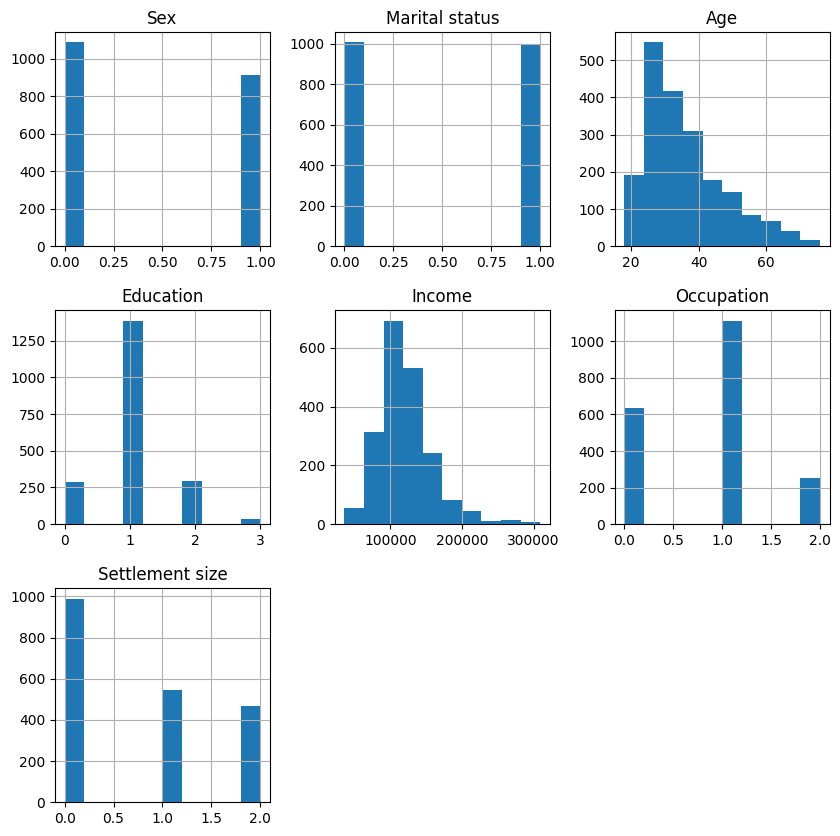

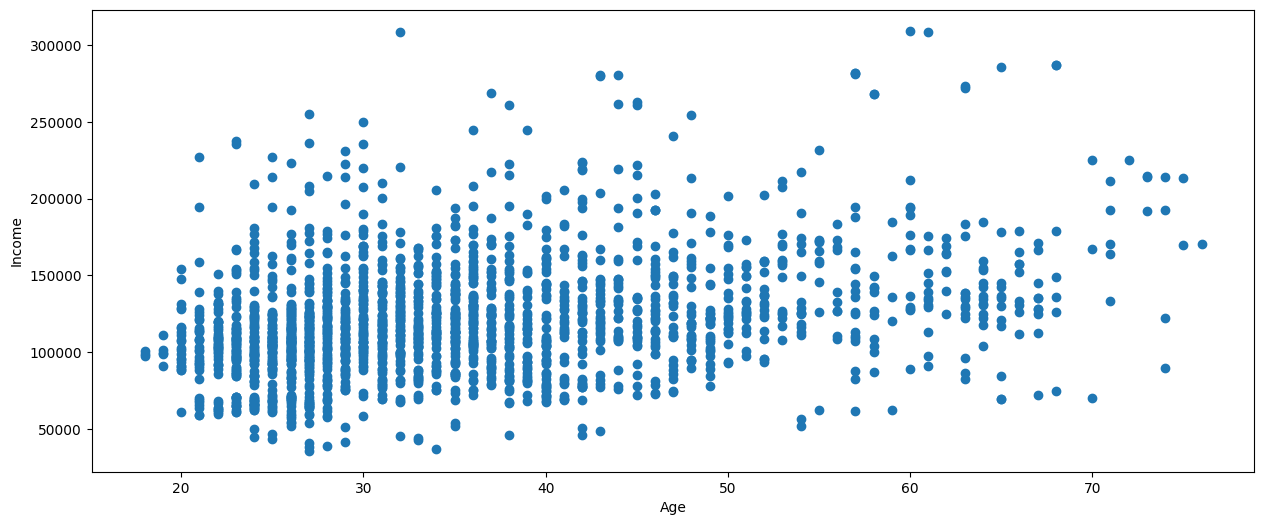

In [4]:
df.hist(figsize =(10,10))
plt.show()

plt.figure(figsize=(15,6))
plt.scatter(df["Age"],df["Income"])

plt.xlabel('Age')
plt.ylabel('Income')
plt.show()

KMeans Clustering

In [5]:
from sklearn.cluster import KMeans  
#training the K-means model on a dataset  
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42, n_init=10)
y_predict= kmeans.fit_predict(df)  
y_predict

C:\Users\DELL\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


array([3, 0, 2, ..., 2, 1, 2])

Cluster Visualization

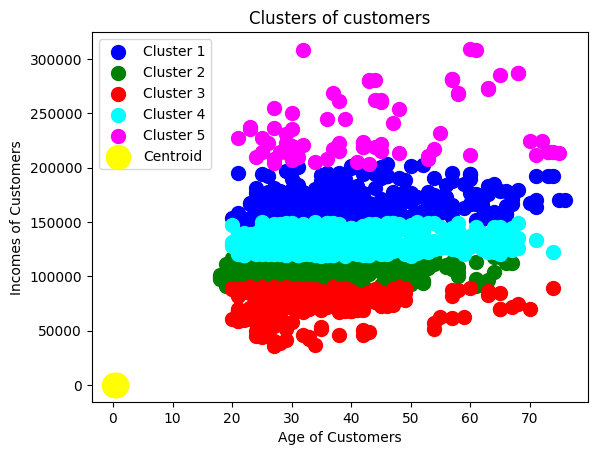

In [6]:
#visulaizing the clusters  
plt.scatter(df['Age'][y_predict == 0], df['Income'][y_predict == 0], s = 100, 
            c = 'blue', label = 'Cluster 1') #for first cluster  
plt.scatter(df['Age'][y_predict == 1], df['Income'][y_predict == 1], s = 100, 
            c = 'green', label = 'Cluster 2') #for second cluster  
plt.scatter(df['Age'][y_predict == 2], df['Income'][y_predict == 2], s = 100, 
            c = 'red', label = 'Cluster 3') #for third cluster  
plt.scatter(df['Age'][y_predict == 3], df['Income'][y_predict == 3], s = 100, 
            c = 'cyan', label = 'Cluster 4') #for fourth cluster  
plt.scatter(df['Age'][y_predict == 4], df['Income'][y_predict == 4], s = 100, 
            c = 'magenta', label = 'Cluster 5') #for fifth cluster  

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], 
            s = 300, c = 'yellow', label = 'Centroid')   

plt.title('Clusters of customers')  
plt.xlabel('Age of Customers')  
plt.ylabel('Incomes of Customers')  
plt.legend()  
plt.show()  

Agglomerative Clustering

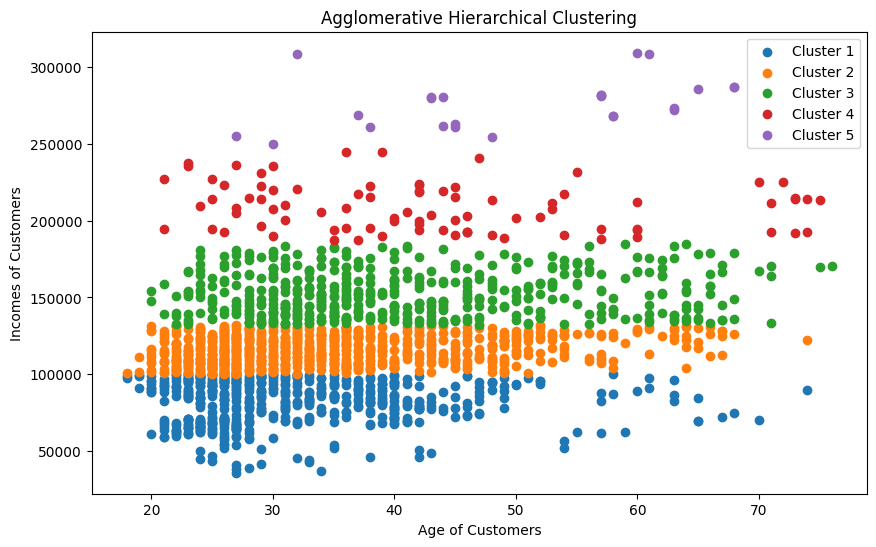

In [7]:
from sklearn.cluster import AgglomerativeClustering

# Initialize the Agglomerative Clustering model
agg_clustering = AgglomerativeClustering(n_clusters=5)

# Fit the model and predict cluster labels
agg_clusters = agg_clustering.fit_predict(df)

# Visualize the clusters
plt.figure(figsize=(10, 6))

for cluster in np.unique(agg_clusters):
    plt.scatter(df['Age'][agg_clusters == cluster], df['Income'][agg_clusters == cluster], label=f'Cluster {cluster + 1}')

plt.title('Agglomerative Hierarchical Clustering')
plt.xlabel('Age of Customers')
plt.ylabel('Incomes of Customers')
plt.legend()
plt.show()
